## Load Basic Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Reading the csv file

In [17]:
df = pd.read_csv('heart.csv')

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.shape

(303, 14)

## Exploring the data set in order to derive useful information

In [20]:
df.shape

(303, 14)

this shows our data has 303 rows and 14 columns

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

we can see the column names here 

In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statstical Details
Describe provides us with statistical information in  the numerical format.
we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs 
mean of age is 54yrs.
The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles
or 4 equal parts. so 25% values lie in each group.
standard deviation and mean are statistical measures which give us an idea of the central tendency 
of the data set. However , mean is effected by outliers and hence we need more information 
to make accurate decisions.



In [23]:
# Data set is not imbalanced
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


we notice that the dataset has no null values.
this saved us from conveting the null values into some data or dropping then altogether.

In [26]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Finding the correlation among the attributes

<AxesSubplot:>

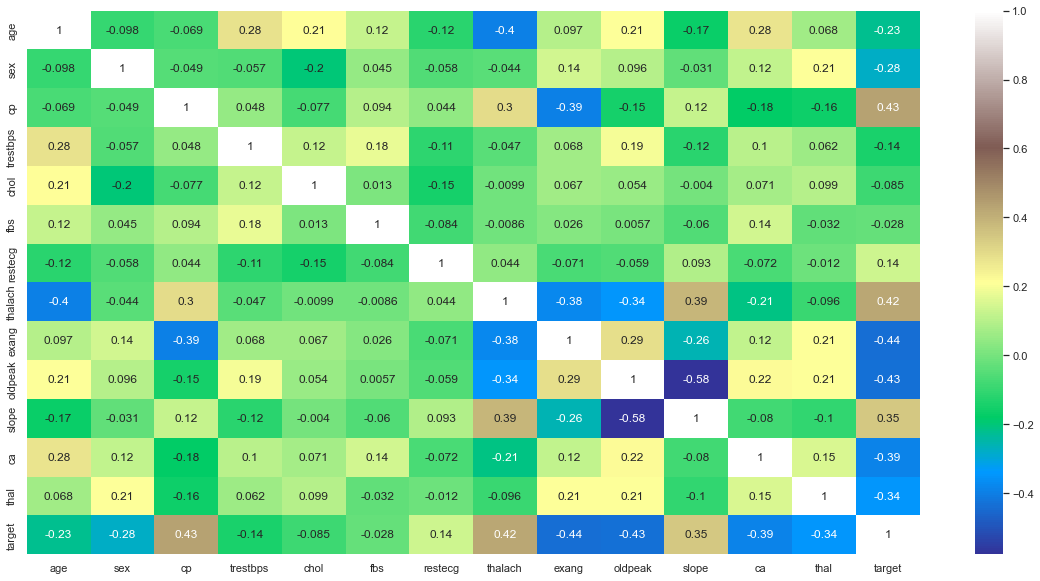

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

#### we observe positive correlation between target and cp, thalach,slope
#### and also negative correlation between target and sex, exang,ca,thai,oldpeak
#### Since cp, thalach and slope has high corr with target, doing univariate analysis of all these three features

## Univariate analysis

In [63]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

### cp

In [93]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

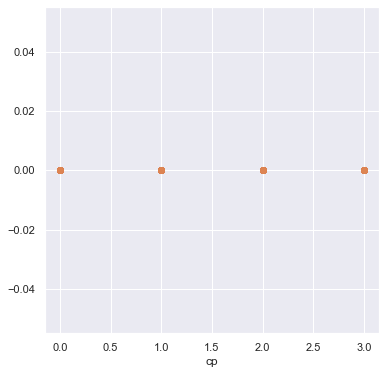

In [88]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]


plt.figure(figsize=(6, 6))
# since this is a categorical value we can skip this one
plt.plot(df_0['cp'],np.zeros_like(df_0['cp']),'o')
plt.plot(df_1['cp'],np.zeros_like(df_1['cp']),'o')



plt.xlabel('cp')
plt.show()

### thalach

No handles with labels found to put in legend.


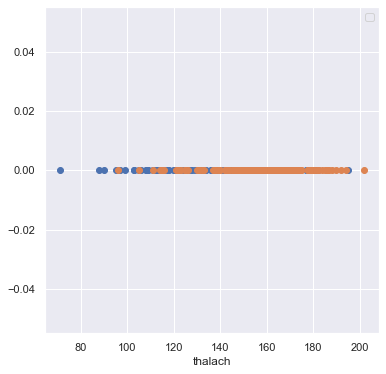

In [89]:
plt.figure(figsize=(6, 6))
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

plt.plot(df_0['thalach'],np.zeros_like(df_0['thalach']),'o')
plt.plot(df_1['thalach'],np.zeros_like(df_1['thalach']),'o')
plt.xlabel('thalach')

plt.legend()

### slope

In [51]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

No handles with labels found to put in legend.


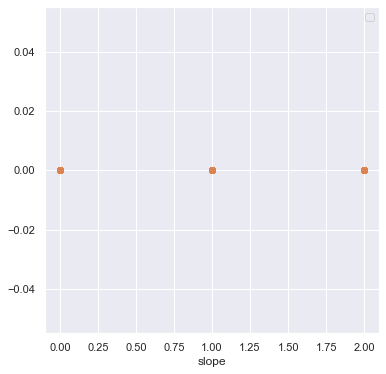

In [90]:
plt.figure(figsize=(6, 6))
plt.plot(df_0['slope'],np.zeros_like(df_0['slope']),'o')
plt.plot(df_1['slope'],np.zeros_like(df_1['slope']),'o')
plt.xlabel('slope')

plt.legend()

## Bivariate analysis

Text(0, 0.5, 'thalach')

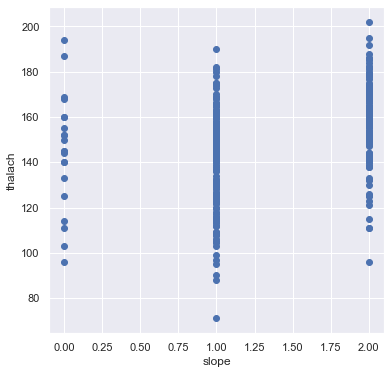

In [87]:
plt.figure(figsize=(6, 6))
plt.scatter(df['slope'], df['thalach'])

plt.xlabel('slope')
plt.ylabel('thalach')

Text(0, 0.5, 'target')

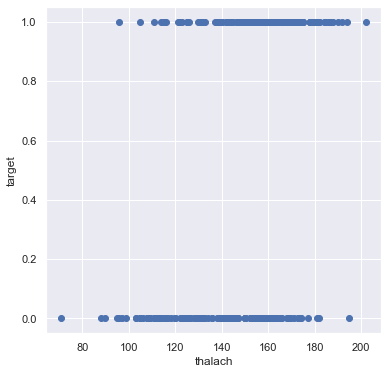

In [86]:
plt.figure(figsize=(6, 6))
plt.scatter(df['thalach'], df['target'])

plt.xlabel('thalach')
plt.ylabel('target')

Text(0, 0.5, 'target')

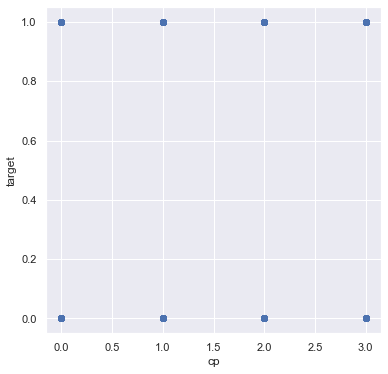

In [85]:
plt.figure(figsize=(6, 6))
plt.scatter(df['cp'], df['target'])

plt.xlabel('cp')
plt.ylabel('target')

Text(0, 0.5, 'target')

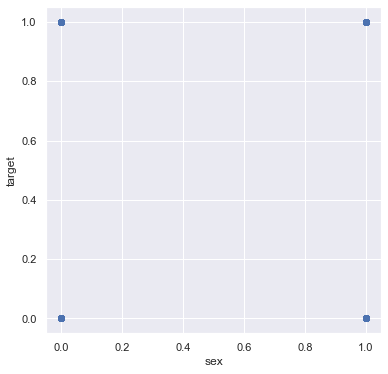

In [82]:
plt.figure(figsize=(6, 6))
plt.scatter(df['sex'], df['target'])

plt.xlabel('sex')
plt.ylabel('target')

## Multivariate analysis

In [ ]:
sns.pairplot(data=df, hue='target')

In [ ]:
df.hist(figsize=(12,12), layout=(5,3));

In [ ]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

In [ ]:
sns.catplot(data=df, x='chol', y='age',  hue='target', palette='husl').set_xticklabels(rotation=45, horizontalalignment='right')

In [ ]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [ ]:
df['sex'].value_counts()

#### 207 males and 96 females

In [ ]:
df['target'].value_counts()

#### 165 cases of heart diseases
#### and 138 cases of no heart diseases

In [ ]:
df['thal'].value_counts()

#### results of thallium stress test measuring blood flow to the heart,
with possible values normal, fixed_defect, reversible_defect

In [ ]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

Here 1 means male and 0 denotes female. 
we observe female having heart disease are comparatively less when compared to males
Males have low heart diseases as compared to females in the given dataset.

In [ ]:
sns.countplot(x='target',palette='BuGn', data=df)

we observe the count for not having heart disease and having heart disease are almost balanced
not having frequency count is 140
and those having heart disease the count is 160.

In [ ]:
sns.countplot(x='ca',hue='target',data=df)

##### ca : number of major vessels (0-3) colored by flourosopy

In [ ]:
df['ca'].value_counts()

ca number of major vessels (0-3) colored by flourosopy
ca has a negative corelation with the target i.e when ca will increase we witness a drop in 
heart diseases and vice versa.

In [ ]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

thal3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [ ]:
df['cp'].value_counts()  # chest pain type

In [ ]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

shows chest pain with respect to heart disease/ target

In [ ]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

In [ ]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

we observe the outliers with the help of boxplot. outliers are values that are very small 
or large in the given data set.

In [ ]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

In [ ]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

In [ ]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

In [ ]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

##### ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

### fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [ ]:
df['fbs'].value_counts()

In [ ]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

In [ ]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

### Cross Tables

In [ ]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

In [ ]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [ ]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

In [ ]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [ ]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

In [ ]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

In [ ]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

# Preparing the data for Model Training

### Scaling the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

In [ ]:
X= df.drop(['target'], axis=1)
y= df['target']

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

### Check the sample Size

In [ ]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

### 1- Logistic Regression

In [ ]:
# this list will contain scores of all the ensemble ML models and models which are base estimator of ensemble models
scores=[]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

In [ ]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

In [ ]:
from sklearn.metrics import accuracy_score
scores.append(accuracy_score(y_test,prediction1))
accuracy_score(y_test,prediction1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

## 2- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=2)
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [ ]:
cm2

In [ ]:
sns.heatmap(cm2, annot=True,cmap='cubehelix')

In [ ]:
scores.append(accuracy_score(y_test,prediction2))
accuracy_score(y_test,prediction2)

In [ ]:
print(classification_report(y_test, prediction2))

## 3- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(bootstrap=False,
 max_depth=6,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=10)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)

In [ ]:
sns.heatmap(cm3, annot=True,cmap='BuPu')

In [ ]:
scores.append(accuracy_score(y_test,prediction3))
accuracy_score(y_test,prediction3)

In [ ]:
print(classification_report(y_test, prediction3))

### 4- Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svm=SVC(kernel='linear')
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [ ]:
cm4

In [ ]:
sns.heatmap(cm4, annot=True)

In [ ]:
scores.append(accuracy_score(y_test,prediction4))
accuracy_score(y_test, prediction4)

In [ ]:
print(classification_report(y_test, prediction4))

### 5- Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing= 2e-9)
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5=confusion_matrix(y_test, prediction5)


In [ ]:
cm5

In [ ]:
sns.heatmap(cm5, annot=True)

In [ ]:
scores.append(accuracy_score(y_test,prediction5))
accuracy_score(y_test, prediction5)

In [ ]:
print(classification_report(y_test, prediction5))

### 6- KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6=confusion_matrix(y_test, prediction5)
cm6

In [ ]:
sns.heatmap(cm6, annot=True)

In [ ]:
scores.append(accuracy_score(y_test,prediction6))
accuracy_score(y_test, prediction6)

In [ ]:
print(classification_report(y_test, prediction6))

### Scores

In [ ]:
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))
print('KNN :', accuracy_score(y_test, prediction6))

## Best accuracy is given by Logistic Regression : 92.3*


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model2, X_train, y_train, cv=5)
cv_score.mean()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model3, X_train, y_train, cv=5)
cv_score.mean()

### Random Forest Model with Hyperparameter tuning using GridSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4, 6, 8]
# Minimum number of samples required to split a node
min_samples_split = [2, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the paramaters grid
param_grid_1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid_1)

In [ ]:
from sklearn.model_selection import GridSearchCV
E_model_1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_1, cv = 3, verbose=5, n_jobs = -1)
E_model_1

In [ ]:
E_model_1.fit(X_train, y_train)

In [ ]:
# print(accuracy_score(y_test, E_predicted_1))
scores.append(E_model_1.best_score_)
E_model_1.best_score_

In [ ]:
E_model_1.best_params_

In [ ]:
E_prediction_1=E_model_1.predict(X_test)
accuracy_score(y_test, E_prediction_1)

### Decision Tree Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
param_grid_2={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
E_model_2=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=10, n_jobs=-1)

In [ ]:
E_model_2.fit(X_train, y_train)

In [ ]:
E_prediction_2=E_model_2.predict(X_test)
accuracy_score(y_test, E_prediction_2)

In [ ]:
scores.append(E_model_2.best_score_)
E_model_2.best_score_

In [ ]:
E_model_2.best_params_

### Adaboost Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ADC=AdaBoostClassifier(n_estimators=150, learning_rate=1.5)
E_model_3=ADC.fit(X_train, y_train)
E_predicted_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_predicted_3)

In [ ]:
# Applying GridSearchCV
param_grid_3={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
E_model_3=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=10, scoring='accuracy')

In [ ]:
E_model_3.fit(X_train, y_train)

In [ ]:
E_prediction_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_prediction_3)

In [ ]:
scores.append(E_model_3.best_score_)
E_model_3.best_score_

In [ ]:
E_model_3.best_params_

### Gradient Boost Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC=GradientBoostingClassifier(n_estimators=16, learning_rate=1.59)
GradientBoostingClassifier()
E_model_4=GBC.fit(X_train, y_train)
E_predicted_4=E_model_4.predict(X_test)
accuracy_score(y_test, E_predicted_4)

In [ ]:
#Applying GrirSearchCV
param_grid_4={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5]
}

In [ ]:
E_model_4=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=10, scoring='accuracy')
E_predicted_4=E_model_4.fit(X_train, y_train)

In [ ]:
scores.append(E_model_4.best_score_)
E_model_4.best_score_

In [ ]:
E_model_4.best_params_

In [ ]:
print(E_model_4)

### XgBoost Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
XGB=XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=45)
E_model_5=XGB.fit(X_train, y_train)
E_predicted_5=E_model_5.predict(X_test)
accuracy_score(y_test, E_predicted_5)

In [ ]:
# Applying GridSearchCV
param_grid_5={
    'n_estimators': [10, 50, 75, 100, 175, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.5, 0.6],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

In [ ]:
E_model_5=GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5)
E_predicted_5=E_model_5.fit(X_train, y_train)

In [ ]:
E_model_5.best_params_

In [ ]:
scores.append(E_model_5.best_score_)
E_model_5.best_score_

### LGBM Classifier with Hyperparameter tuning using GridSearchCV

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
LGB=LGBMClassifier(n_estimators=45, learning_rate=0.065, num_leaves=30, random_state=42, objective='binary')
E_model_6=LGB.fit(X_train, y_train)
E_predicted_6=E_model_6.predict(X_test)
accuracy_score(y_test, E_predicted_6)



In [ ]:
# Applying GridSearchCV
param_grid_6={
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.05, 0.1, 0.3],
    'num_leaves': [20, 50, 80, 100]
}

In [ ]:
E_model_6=GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
E_predicted_6=E_model_6.fit(X_train, y_train)


In [ ]:
E_model_6.best_params_

In [ ]:
scores.append(E_model_6.best_score_)
E_model_6.best_score_

## AUC for Ensemble Learning Models

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

### Random Forest

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_1.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Random Forest Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Decision Tree Classifier

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_2.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='blue',lw=5)
plt.show()

### AdaBoost Classifier

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_3.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC AdaBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### GradientBoosting Classifier

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_4.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC GradientBoosting Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='yellow',lw=5)
plt.show()

### XgBoost Classifier

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_5.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC XgBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='orange',lw=5)
plt.show()

### Light GBMClassifier

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_6.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC LightGBMClassifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='brown',lw=5)
plt.show()

## Analysis of Models

In [ ]:
names=["Logistic Regression", "Decision Tree Classifier", "Random Forest", "Linear_SVM", "Naive_Bayes", "KNN", "Logistic Regression_CV", 
         "Decision Tree_CV", "Adaboost_CV", "Gradient Boost_CV", "XgBoost_CV", "LGMB_CV"]

In [ ]:
scores

In [ ]:
df_stat = pd.DataFrame()
df_stat['models'] = names
df_stat['score'] = scores
df_stat

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="models", x="score", data=df_stat)